In [1]:
# jupyter tricks
from IPython.core.display import display, HTML
from IPython.core.pylabtools import figsize

def multi_table(table_list):
    '''
    Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
            
    
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + pd.DataFrame(table)._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
figsize(14, 7)

# Introduction to ML - Recommendation Systems
Welcome!  
These jupyter notebooks contain the slides for the Czechitas weekend workshop. The organization is following:
- the slides contain general theory
- at the end of each section, there is a short Tips & Tricks section
    - they should help you with your own code
- the actual code will be shared after the workshop

Let's start learning!

## Part 0 - Introduction

## This weekend
- Git
- Data loading
  - SQL
  - API
- EDA
- Intro ML 
- Regression - OLS & LASSO
- Distances
- Classification - kNN
- PCA
- Collaborative Filtering
- Clustering - k-Means
- SVD

## \#Me

Michal Kubišta  
<kubistmi@gmail.com>  
[github.com/kubistmi](https://github.com/kubistmi)  

## Questions?

## Part 1 - Loading warmup!
- What is an ETL process?
- Why should I care? I want to do proper ML!
- What is ```SQL```?
- What is ```API```?

### 1.1 Load from csv

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# API
import requests
# SQL
from sqlalchemy import create_engine, MetaData, Table, select

In [3]:
os.listdir('data')

['books.csv',
 'book_tags.csv',
 'ratings.csv',
 'sample_book.xml',
 'tags.csv',
 'to_read.csv']

In [4]:
# ratings
rats = pd.read_csv('data/ratings.csv')

print(rats.shape)
rats.head()

(981756, 3)


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
# tags
tags = pd.read_csv('data/tags.csv')

print(tags.shape)
tags.head()

(34252, 2)


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [6]:
# to read
to_read = pd.read_csv('data/to_read.csv')

print(to_read.shape)
to_read.head()

(912705, 2)


,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


### 1.2 Load from SQL

In [7]:
engine = create_engine(
    '{type}://{user}:{password}@{host}:{port}/{database}'.format(
        type = 'postgresql',
        host= '',
        port= '5432',
        database= '',
        user= '',
        password= '' 
        )
    )

In [8]:
# PYTHON OOP
conn = engine.connect()
metadata = MetaData()

books = Table('books', metadata, autoload_with=engine)

query = select([books]).where(books.columns.id == 1)
print(query)

SELECT books.id, books.book_id, books.best_book_id, books.work_id, books.books_count, books.isbn, books.isbn13, books.authors, books.original_publication_year, books.original_title, books.title, books.language_code, books.average_rating, books.ratings_count, books.work_ratings_count, books.work_text_reviews_count, books.ratings_1, books.ratings_2, books.ratings_3, books.ratings_4, books.ratings_5, books.image_url, books.small_image_url 
FROM books 
WHERE books.id = :id_1


In [9]:
sql_res = conn.execute(query).fetchmany(5)
display(pd.DataFrame(sql_res[:15], columns= sql_res[0].keys()))

conn.close()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [10]:
# DIRECTLY
sql_res = engine.execute("SELECT * FROM books").fetchall()
book = pd.DataFrame(sql_res, columns= sql_res[0].keys())

print(book.shape)
book.head()

(10000, 23)


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.78043902348e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.78043955493e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.78031601584e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.78006112008e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.78074327356e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### Tips & Tricks

In [11]:
"""
# Tips & Tricks
engine = create_engine('{type}://{user}:{password}@{host}:{port}/{database}')
engine.execute('QUERY').fetchmany(X)
"""
display()

### 1.3 Load from API

In [12]:
req = requests.get(
    'http://{host}:{port}/{endpoint}'.format(
        host = 'localhost',
        port = '8000',
        endpoint = '')
    )
display(req, req.headers, req.encoding, req.text)

<Response [200]>

{'Accept-Ranges': 'bytes', 'Content-Length': '322', 'Content-Type': 'text/html; charset=utf-8', 'Last-Modified': 'Thu, 14 Mar 2019 14:12:00 GMT', 'Date': 'Thu, 11 Apr 2019 15:02:29 GMT'}

'utf-8'

'<html>\n  <head>\n    <title>Hello Czechitas</title>\n  </head>\n  <body>\n    <h1>Welcome to Czechitas Recommendation System Workshop data repository.</h1>\n    The API contains the following endpoints reacheable with GET method: </br>\n    <ul>\n      <li>/tags/{tag_id}</li>\n      <li>/tags-all</li>\n    </ul>\n  </body>\n</html>'

In [13]:
display(HTML(req.text))

In [14]:
req = requests.get(
    'http://{host}:{port}/{endpoint}'.format(
        host = 'localhost',
        port = '8000',
        endpoint = '/tags-all')
    )

print(req.json()[:10])

bk_tags = pd.DataFrame(req.json())
bk_tags.goodreads_book_id = bk_tags.goodreads_book_id.astype('int64')
bk_tags.tag_id = bk_tags.tag_id.astype('int64')

print(bk_tags.shape)
bk_tags.head()

[{'goodreads_book_id': '1', 'tag_id': '30574', 'count': 167697}, {'goodreads_book_id': '1', 'tag_id': '11305', 'count': 37174}, {'goodreads_book_id': '1', 'tag_id': '11557', 'count': 34173}, {'goodreads_book_id': '1', 'tag_id': '8717', 'count': 12986}, {'goodreads_book_id': '1', 'tag_id': '33114', 'count': 12716}, {'goodreads_book_id': '1', 'tag_id': '11743', 'count': 9954}, {'goodreads_book_id': '1', 'tag_id': '14017', 'count': 7169}, {'goodreads_book_id': '1', 'tag_id': '5207', 'count': 6221}, {'goodreads_book_id': '1', 'tag_id': '22743', 'count': 4974}, {'goodreads_book_id': '1', 'tag_id': '32989', 'count': 4364}]
(999912, 3)


,count,goodreads_book_id,tag_id
0,167697,1,30574
1,37174,1,11305
2,34173,1,11557
3,12986,1,8717
4,12716,1,33114


### Tips & Tricks

In [15]:
"""
requests.get('http://{host}:{port}/{endpoint}')
response.json()
"""
display()

## Part 2 - EDA warmup!
**What would you do?**

what to look for:
- distributions
- missing / nonsense values
- duplicates
- normalization


### 2.1 Normalization

In [16]:
multi_table([
    book.iloc[:5,:5],
    bk_tags.head()
])

In [17]:
# Range of the IDs?
print((book.id.min(), book.id.max()))
print((bk_tags.goodreads_book_id.min(), bk_tags.goodreads_book_id.max()))

(1, 10000)
(1, 33288638)


In [18]:
# are goodreads_id and book_id the same?
sum(
    book.book_id.isin(
        bk_tags.goodreads_book_id.drop_duplicates()
        )
    ) == book.shape[0]

True

In [19]:
# normalise the IDs
bk_tags = (
    bk_tags
    .merge(
        book.loc[:,['id', 'book_id']],
        left_on  = 'goodreads_book_id',
        right_on = 'book_id'
        )
    .drop(['goodreads_book_id', 'book_id'], axis = 1)
    .rename({'id':'book_id'}, axis = 1)
)

bk_tags.head()

,count,tag_id,book_id
0,167697,30574,27
1,37174,11305,27
2,34173,11557,27
3,12986,8717,27
4,12716,33114,27


### 2.2 Tags

In [20]:
tg_freq = (
    bk_tags
    .groupby('tag_id')
    .aggregate(
        {'count' : 'sum',
        'book_id': 'size'
        }
    )
)

print(tg_freq.shape)
tg_freq.head()

(34252, 2)


,count,book_id
tag_id,,
0,24,7
1,6,2
2,3,1
3,3,1
4,3,1


#### Keep 100 tags <font color = 'red'>!!! analysis parameter !!!</font>

In [21]:
most_freq = (
    tg_freq
    .sort_values('count', ascending = False)
    .iloc[:100,:]
)

tags100 = (
    tags    
    .merge(most_freq, left_on= 'tag_id', right_index = True)
    .sort_values('count', ascending = False)
)
del(tg_freq, most_freq)

In [22]:
tags100.head()

,tag_id,tag_name,count,book_id
30574,30574,to-read,140718761,9983
8717,8717,currently-reading,7507958,9776
11557,11557,favorites,4503173,9881
11743,11743,fiction,3688819,9097
11305,11305,fantasy,3548157,4259


#### How about nonsense tags?

In [23]:
# remove nonsense
tags_pat = 'read|own|buy|default|favou?rit|book|library|wish'
tags100 = tags100.loc[
    ~tags100.tag_name.str.contains(tags_pat)
]

multi_table([
    tags100.query('book_id < 1000'),
    tags100.loc[:,['count', 'book_id']].describe()
])

,tag_id,tag_name,count,book_id
13561,13561,graphic-novels,313560,491
31745,31745,vampires,300730,633
10064,10064,dystopian,281487,755
10059,10059,dystopia,231846,718
22983,22983,paranormal-romance,221939,840
7778,7778,comics,193981,469
19733,19733,memoir,183477,905
19052,19052,manga,148583,196
13547,13547,graphic-novel,138563,484
21387,21387,new-adult,132973,597


#### Visualise frequencies

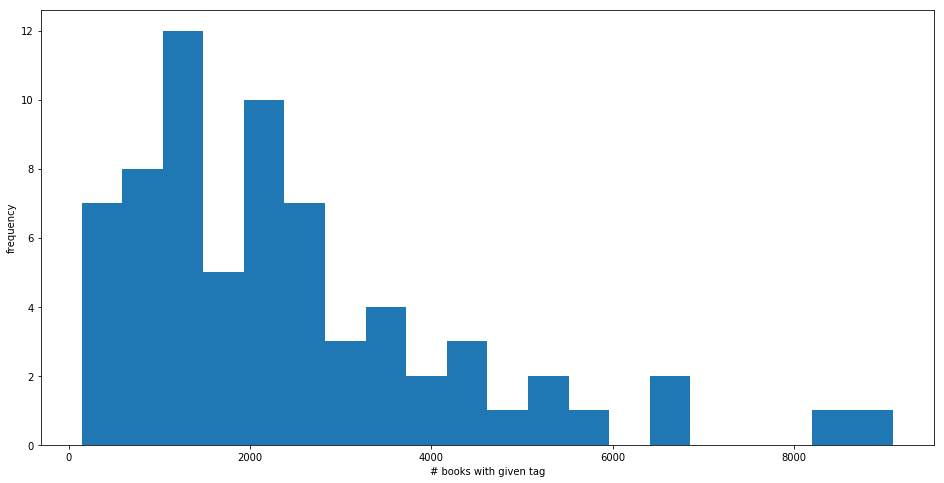

In [24]:
# fancy tag histogram
plt.figure(figsize = (16,8))
_ = plt.hist(tags100.book_id, bins = 20)
_ = plt.xlabel('# books with given tag')
_ = plt.ylabel('frequency')
plt.show()

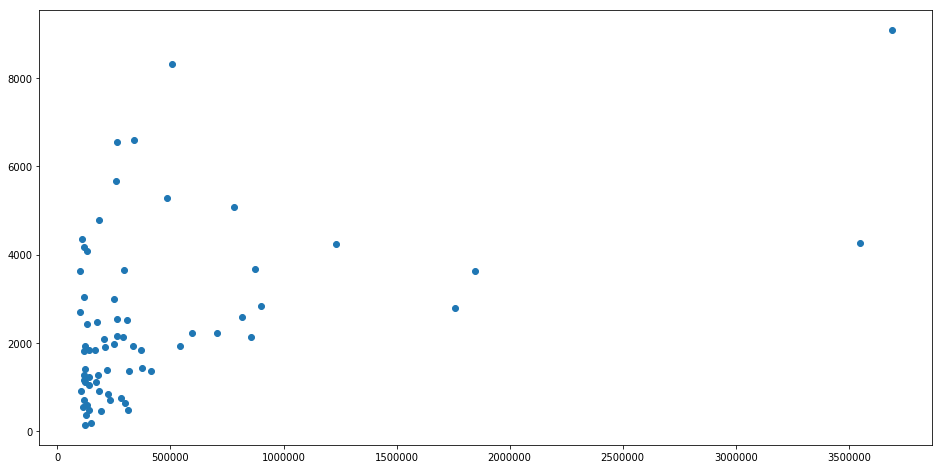

In [25]:
# tag counts scatterplot
plt.figure(figsize = (16,8))
_ = plt.scatter(tags100['count'], tags100.book_id)
plt.show()

#### Prepare tidy model input

In [26]:
bk_tags100 = (
    bk_tags
    .merge(
        tags100.loc[:,['tag_id', 'tag_name']],
        on = 'tag_id'
        )
    .drop({'count'}, axis = 1)
)

bk_tags100.head()

,tag_id,book_id,tag_name
0,11305,27,fantasy
1,11305,21,fantasy
2,11305,2,fantasy
3,11305,18,fantasy
4,11305,24,fantasy


In [27]:
bk_tag_mat = (
    bk_tags100
    .drop('tag_name', axis = 1)
    .assign(help = 1)
    .pivot_table(
        values = 'help',
        index = 'book_id',
        columns = 'tag_id',
        fill_value = 0)
)
del(tags100)

print(bk_tag_mat.shape)
bk_tag_mat.iloc[:10, :10]

(10000, 69)


tag_id,1416,1642,1659,1691,3358,3371,4605,6750,6828,6857
book_id,,,,,,,,,,
1,0,0,0,1,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,1,1
3,1,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,1,0,0,1,0
5,0,1,1,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,1,0,0
7,1,1,1,1,1,1,0,0,0,1
8,1,1,1,0,0,0,0,0,0,0
9,1,1,1,1,0,1,0,0,0,0


#### How many tags per book?

In [28]:
tg_per_book = bk_tag_mat.apply(sum, axis = 1)

idx = tg_per_book[tg_per_book == max(tg_per_book)].index.values

multi_table([
    tg_per_book.describe(),
    bk_tags100.query('book_id == @idx[0]').iloc[:15],
    book[book.id.isin(idx)].loc[:,['id','title']]
])

In [29]:
#cleanup
del(idx, tg_per_book)

### 2.3 Ratings

In [30]:
# ratings frequency
print(rats.user_id.drop_duplicates().count())

usr_rat = (
    rats
    .groupby('user_id')
    .size()
    .sort_values()
    .reset_index()
    .rename({0 : 'ratings'}, axis = 1)
)

usr_rat.ratings.describe()

53424


count    53424.000000
mean        18.376685
std         26.268690
min          2.000000
25%          3.000000
50%          8.000000
75%         22.000000
max        200.000000
Name: ratings, dtype: float64

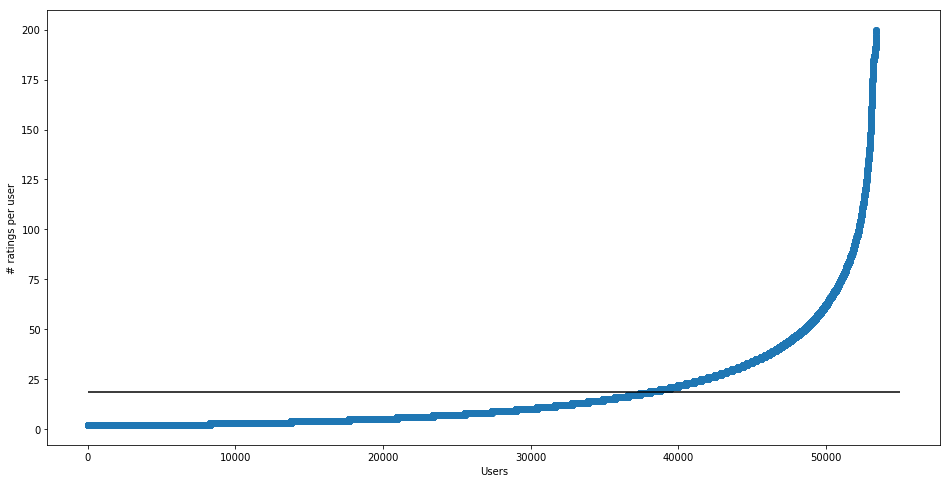

In [31]:
plt.figure(figsize = (16, 8))
_ = plt.scatter(x = usr_rat.index, y = usr_rat.ratings)
_ = plt.xlabel('Users')
_ = plt.ylabel('# ratings per user')
_ = plt.hlines(usr_rat.ratings.mean(), 0, 55000)
plt.show()

#### Duplicated ratings?

In [32]:
rat_dup = (
        rats
        .groupby(['user_id', 'book_id'])
        .size()
)

rat_dup = (
    rat_dup
    [rat_dup>1]
    .reset_index()
    .merge(rats, on = ['user_id', 'book_id'])
    .rename({0:'dups'}, axis = 1)
)
rat_dup.head()

,user_id,book_id,dups,rating
0,7,4608,2,3
1,7,4608,2,2
2,16,8946,2,5
3,16,8946,2,3
4,17,7063,2,5


In [33]:
# keep maximum ratings
max_rat = rats.groupby(['book_id', 'user_id']).rating.transform(max)
rats = rats.loc[rats.rating == max_rat].drop_duplicates()

del(max_rat, rat_dup)

sum(
    rats
    .groupby(['user_id', 'book_id'])
    .size() 
    > 1
)

0

In [34]:
multi_table([
    rats.rating.describe(),
    rats.groupby('rating').size()
])

,rating
count,979478.000000
mean,3.856483
std,0.983844
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000
,0
rating,


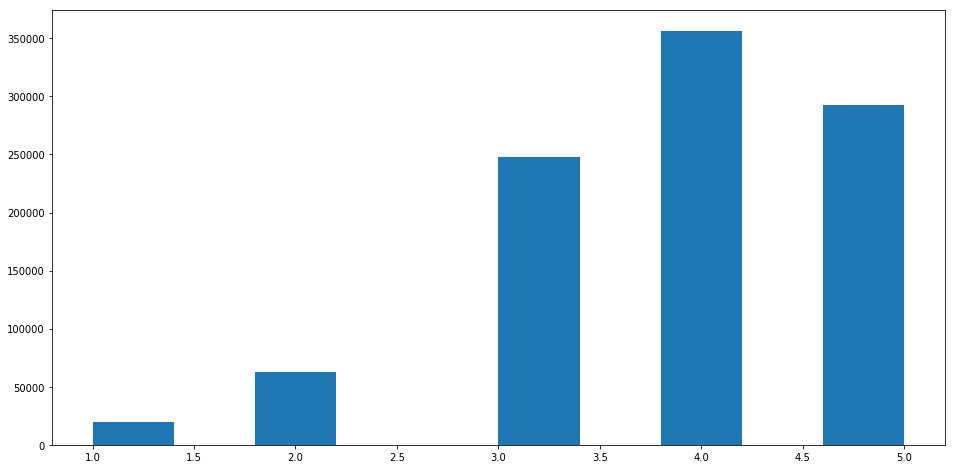

In [35]:
# rating distribution
plt.figure(figsize = (16,8))
_ = plt.hist(rats.rating)
plt.show()

In [ ]:
%store 